# Comparison of sliders
In this tutorial, we compare the results and parameters of time-windowed sliders.

We begin by loading a TESS light curve:

In [1]:
import numpy as np
from astropy.io import fits

def load_file(filename):
    """Loads a TESS *spoc* FITS file and returns TIME, PDCSAP_FLUX"""
    hdu = fits.open(filename)
    time = hdu[1].data['TIME']
    flux = hdu[1].data['PDCSAP_FLUX']
    flux[flux == 0] = np.nan
    return time, flux

print('Loading TESS data from archive.stsci.edu...')
path = 'https://archive.stsci.edu/hlsps/tess-data-alerts/'
filename = 'hlsp_tess-data-alerts_tess_phot_00077031414-s02_tess_v1_lc.fits'
time, flux = load_file(path + filename)

Loading TESS data from archive.stsci.edu...


We use wotan to detrend with two methods: A sliding mean (red) and a sliding biweight (blue)

In [10]:
from wotan import flatten
flatten_lc1, trend_lc1 = flatten(
    time, flux, window_length=0.75, return_trend=True, method='mean')
flatten_lc2, trend_lc2 = flatten(
    time, flux, window_length=0.75, return_trend=True, method='biweight')

We plot the result:

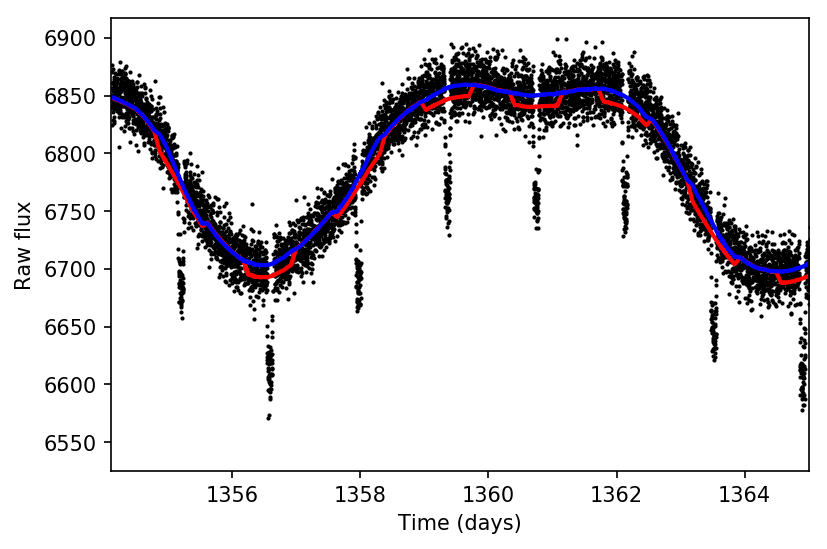

In [5]:
import matplotlib.pyplot as plt
from matplotlib import rcParams; rcParams["figure.dpi"] = 150
plt.figure()
plt.scatter(time, flux, s=1, color='black')
plt.plot(time, trend_lc1, linewidth=2, color='red')
plt.plot(time, trend_lc2, linewidth=2, color='blue')
plt.xlabel('Time (days)')
plt.ylabel('Raw flux')
plt.xlim(min(time), 1365);

The difference between the robust slider ("biweight", blue) and the running mean (red) is negligible in out-of-transit areas, but very import during in-transit times:

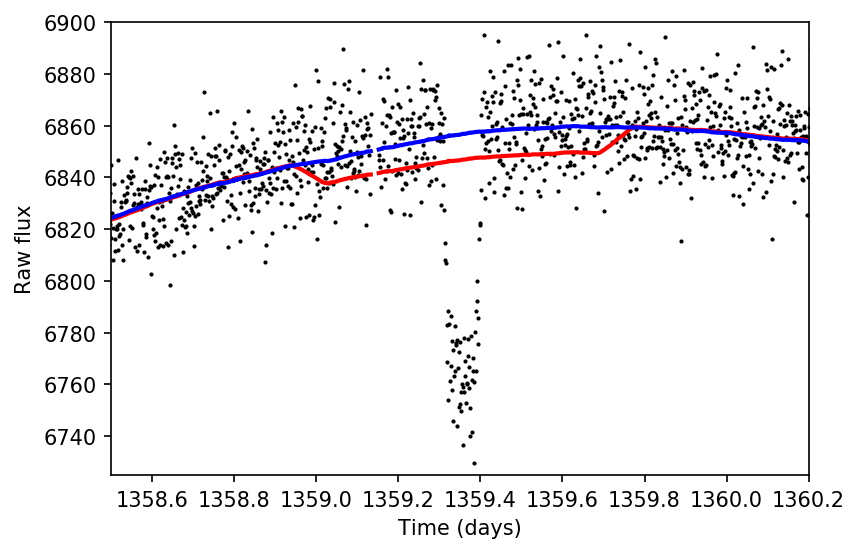

In [6]:
plt.figure()
plt.scatter(time, flux, s=1, color='black')
plt.plot(time, trend_lc1, linewidth=2, color='red')
plt.plot(time, trend_lc2, linewidth=2, color='blue')
plt.xlim(1358.5, 1360.2)
plt.ylim(6725, 6900)
plt.xlabel('Time (days)')
plt.ylabel('Raw flux')
plt.show();

Clearly, the sliding mean (red) is fitting out the transits, whereas the sliding biweight (blue) provides an adequate fit. This issue can not be healed by using a longer window, which would result in a severe underfit. Let us now compare the most robust (and least efficient) location estimator, the median - and show what we mean with *most robust* and *least efficient*.

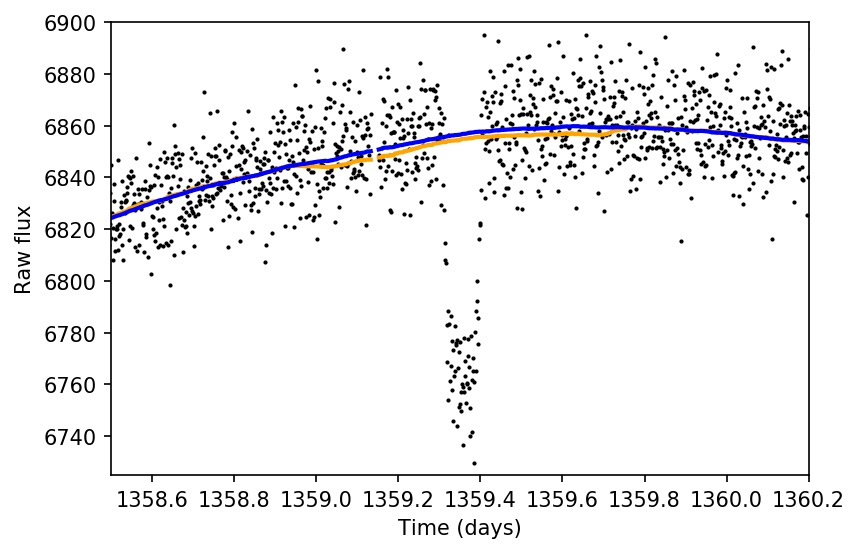

In [11]:
flatten_lc1, trend_lc1 = flatten(
    time, flux, window_length=0.75, return_trend=True, method='median')
flatten_lc2, trend_lc2 = flatten(
    time, flux, window_length=0.75, return_trend=True, method='biweight')

plt.figure()
plt.plot(time, trend_lc1, linewidth=2, color='orange')
plt.plot(time, trend_lc2, linewidth=2, color='blue')
plt.scatter(time, flux, s=1, color='black')
plt.xlabel('Time (days)')
plt.ylabel('Raw flux')
plt.xlim(1358.5, 1360.2)
plt.ylim(6725, 6900);

We can see that the median (orange) produces actually a worse fit during in-transit times. How can this be? It should be more robust to these outliers. This can be explained by the fact that the biweight weights down all points that are beyond 4 sigma from the mean (in its default parametrization), so that these points have *zero* influence. Therefore, in this particular case, the median is a *worse* estimatator than the biweight, despite being more robust in general.

What is more, the median is also the least efficient estimator. As it discards all but one point for its estimates, it suffers from increased jitter. We can visualize this extra noise by zooming in:

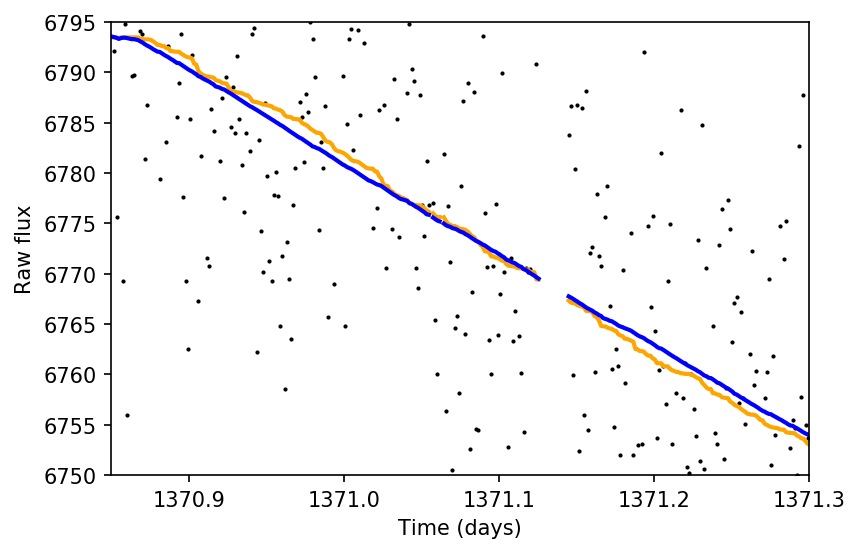

In [12]:
flatten_lc1, trend_lc1 = flatten(
    time, flux, window_length=0.75, return_trend=True, method='median')
flatten_lc2, trend_lc2 = flatten(
    time, flux, window_length=0.75, return_trend=True, method='biweight')

plt.figure()
plt.scatter(time, flux, s=1, color='black')
plt.plot(time, trend_lc1, linewidth=2, color='orange')
plt.plot(time, trend_lc2, linewidth=2, color='blue')
plt.xlabel('Time (days)')
plt.ylabel('Raw flux')
plt.xlim(1370.85, 1371.3)
plt.ylim(6750, 6795);

The additional noise (jitter) of the median (orange) is apparent. For the purpose of transit detection, it has shown optimal to use a robust method such as the biweight.

The differences between various other robust sliders are often very small:

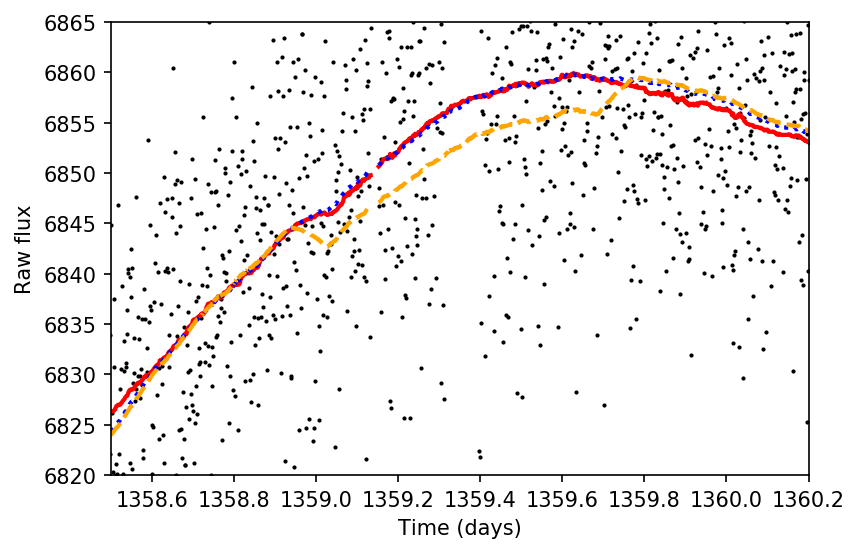

In [9]:
flatten_lc1, trend_lc1 = flatten(
    time, flux, window_length=0.75, return_trend=True, method='welsch')
flatten_lc2, trend_lc2 = flatten(
    time, flux, window_length=0.75, return_trend=True, method='biweight')
flatten_lc3, trend_lc3 = flatten(
    time, flux, window_length=0.75, return_trend=True, method='huber')

plt.figure()
plt.scatter(time, flux, s=1, color='black')
plt.plot(time, trend_lc1, linewidth=2, color='red')
plt.plot(time, trend_lc2, linewidth=2, color='blue', linestyle='dotted')
plt.plot(time, trend_lc3, linewidth=2, color='orange', linestyle='dashed')
plt.xlabel('Time (days)')
plt.ylabel('Raw flux')
plt.xlim(1358.5, 1360.2)
plt.ylim(6820, 6865);